In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import requests
from sklearn.metrics.pairwise import cosine_similarity as distance
import pandas as pd

In [ ]:
import nltk 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

def tokenization(text):
    tokens = nltk.word_tokenize(text)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(text)
    nltk.download('stopwords')
    stop_words = set(stopwords.words('english'))
    tokens_clean = [e for e in tokens if e not in stop_words]
    return tokens_clean

In [ ]:
users = {'Danny Torrance' : [],
 'Danny Torrances Finger': [],
 'Ellen Ripley': [],
 'J. Jonah Jameson':[],
 'John Wick':[],
 'Leia Organa':[],
 'Mike Wazowski':[],
 'Tony Stark':[]}

In [ ]:
def getting_every_sentence():
    #gets a dictionary of users as keys and their sentences as values
    x=list(coll.find())
    users_dict=dict()
    for i in range(len(x)):
        if x[i]['userName'] not in users_dict:
            users_dict[x[i]['userName']]=x[i]['text']
        else:
            users_dict[x[i]['userName']]+=' ' +x[i]['text']
    for e in users_dict:
        users_dict[e]=re.sub(r"[^a-zA-Z0-9]+", ' ', users_dict[e])
    return users_dict

In [190]:
for user in users:
    URL = f"http://localhost:8080"
    x = requests.get(url = URL).json()

In [193]:
users_dict=dict()
for i in range(len(x)):
    if x[i]['userName'] not in users_dict:
        users_dict[x[i]['userName']]=x[i]['text']
    else:
        users_dict[x[i]['userName']]+=' ' +x[i]['text']

In [203]:
users_dict

{'John Wick': 'Hey Mike, whats up?? No, had to work. How was it? No way! 😮️ I bet people went crazy Motherfucker! Hungover? 😵️ Sure, boss. I do! I just dont feel appreciated in my job I dunno... Maybe Thank you, boss! I feel much better...',
 'Mike Wazowski': 'Dude!!! 😀️ Did you watch the game last night? Awesome! Boyander scored 3 goals! Way... For sure. We stayed at KuboLoco until 6AM. Dead, burried and still suffering! \U0001f92e️ Sweety pie! How Ive longed to talk to you. Its Mike, honey bunny. Or doctor LOVE! And youre a sick little girl. Cant handle me on your own? That would be hot... 🔥️ I NEED VODKA LIKE A CAR NEEDS GAS',
 'Leia Organa': 'Im so angry right now! Impossible! Cant do it! Just cant! He pissed me off so much. But how am I suposed to fix the facial recognition system if it doesnt even work? And who the hell is Tony? \U0001f92f️ Oh shit. I think youre friends with my brother.',
 'Tony Stark': 'I saw you this morning. You shouldnt get so upset. ❤️ Dont get so frustrate

In [195]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [210]:
string = ''
for e in users_dict.values():
    string += e

In [211]:
users_dict.values() = tokenization(string)

'Hey Mike, whats up?? No, had to work. How was it? No way! 😮️ I bet people went crazy Motherfucker! Hungover? 😵️ Sure, boss. I do! I just dont feel appreciated in my job I dunno... Maybe Thank you, boss! I feel much better...Dude!!! 😀️ Did you watch the game last night? Awesome! Boyander scored 3 goals! Way... For sure. We stayed at KuboLoco until 6AM. Dead, burried and still suffering! \U0001f92e️ Sweety pie! How Ive longed to talk to you. Its Mike, honey bunny. Or doctor LOVE! And youre a sick little girl. Cant handle me on your own? That would be hot... 🔥️ I NEED VODKA LIKE A CAR NEEDS GASIm so angry right now! Impossible! Cant do it! Just cant! He pissed me off so much. But how am I suposed to fix the facial recognition system if it doesnt even work? And who the hell is Tony? \U0001f92f️ Oh shit. I think youre friends with my brother.I saw you this morning. You shouldnt get so upset. ❤️ Dont get so frustrated, Leia. Remember what German said. Im sure you will find a way. I am Iron 

In [197]:
count_vectorizer = CountVectorizer()
sparse_matrix = count_vectorizer.fit_transform(users_dict.values())
sparse_matrix

<8x212 sparse matrix of type '<class 'numpy.int64'>'
	with 279 stored elements in Compressed Sparse Row format>

In [198]:
doc_term_matrix = sparse_matrix.todense()
df = pd.DataFrame(doc_term_matrix, 
                  columns=count_vectorizer.get_feature_names(), 
                  index=users_dict.keys())
display(df)

,6am,aa,about,again,alcoholics,alien,am,and,angry,anonymous,...,why,will,with,work,would,www,you,your,youre,youve
John Wick,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
Mike Wazowski,1,0,0,0,0,0,0,2,0,0,...,0,0,0,0,1,0,2,1,1,0
Leia Organa,0,0,0,0,0,0,1,1,1,0,...,0,0,1,1,0,0,0,0,1,0
Tony Stark,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,3,0,0,0
Ellen Ripley,0,1,0,2,1,1,0,0,0,1,...,0,0,0,0,0,1,1,0,0,1
J. Jonah Jameson,0,0,0,0,0,0,0,2,0,0,...,1,0,0,0,0,0,1,0,0,3
Danny Torrances Finger,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Danny Torrance,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [199]:
similarity_matrix = distance(df, df)
print(similarity_matrix)

[[1.         0.14686936 0.18677184 0.1627907  0.08993875 0.09113533
  0.02577696 0.13953488]
 [0.14686936 1.         0.18020684 0.16522803 0.12424948 0.20144406
  0.06104677 0.1835867 ]
 [0.18677184 0.18020684 1.         0.16601942 0.10032154 0.14638501
  0.06900656 0.06225728]
 [0.1627907  0.16522803 0.16601942 1.         0.11242344 0.12758946
  0.02577696 0.13953488]
 [0.08993875 0.12424948 0.10032154 0.11242344 1.         0.24671758
  0.04984448 0.08993875]
 [0.09113533 0.20144406 0.14638501 0.12758946 0.24671758 1.
  0.0808122  0.07290826]
 [0.02577696 0.06104677 0.06900656 0.02577696 0.04984448 0.0808122
  1.         0.12888482]
 [0.13953488 0.1835867  0.06225728 0.13953488 0.08993875 0.07290826
  0.12888482 1.        ]]


,John Wick,Mike Wazowski,Leia Organa,Tony Stark,Ellen Ripley,J. Jonah Jameson,Danny Torrances Finger,Danny Torrance
John Wick,1.000000,0.146869,0.186772,0.162791,0.089939,0.091135,0.025777,0.139535
Mike Wazowski,0.146869,1.000000,0.180207,0.165228,0.124249,0.201444,0.061047,0.183587
Leia Organa,0.186772,0.180207,1.000000,0.166019,0.100322,0.146385,0.069007,0.062257
Tony Stark,0.162791,0.165228,0.166019,1.000000,0.112423,0.127589,0.025777,0.139535
Ellen Ripley,0.089939,0.124249,0.100322,0.112423,1.000000,0.246718,0.049844,0.089939
J. Jonah Jameson,0.091135,0.201444,0.146385,0.127589,0.246718,1.000000,0.080812,0.072908
Danny Torrances Finger,0.025777,0.061047,0.069007,0.025777,0.049844,0.080812,1.000000,0.128885
Danny Torrance,0.139535,0.183587,0.062257,0.139535,0.089939,0.072908,0.128885,1.000000


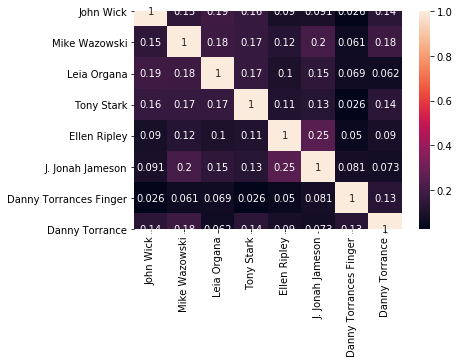

In [200]:
# Convert it to dataframe to visualize with seaborn
import seaborn as sns
sim_df = pd.DataFrame(similarity_matrix, columns=users_dict.keys(), index=users_dict.keys())
display(sim_df)
sns.heatmap(sim_df,annot=True)

In [201]:
# Max similarities of related documents
import numpy as np
np.fill_diagonal(sim_df.values, 0) # Remove diagonal max values and set those to 0
sim_df.idxmax()

John Wick                      Leia Organa
Mike Wazowski             J. Jonah Jameson
Leia Organa                      John Wick
Tony Stark                     Leia Organa
Ellen Ripley              J. Jonah Jameson
J. Jonah Jameson              Ellen Ripley
Danny Torrances Finger      Danny Torrance
Danny Torrance               Mike Wazowski
dtype: object